In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("all_log_1e4_fit.csv", delim_whitespace=True)

In [3]:
df.head(5)

,detector,eta,pt,pt_res,pt_resE,p_res,p_resE
0,MM_6_3x2_1D,0,10,2.125370,0.017687,2.125450,0.017685
1,MM_6_3x2_1D,0,1,0.834690,0.007203,0.839432,0.007362
2,MM_6_3x2_1D,0,20,3.989230,0.034151,3.989230,0.034151
3,MM_6_3x2_1D,0,2,0.905125,0.007399,0.905168,0.007397
4,MM_6_3x2_1D,0,30,5.941470,0.055970,5.941470,0.055970


In [4]:
def getdata(det="TPC", eta=0):
    pt = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["pt"])
    pt_res = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["pt_res"])
    pt_resE = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["pt_resE"])
    p_res = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["p_res"])
    p_resE = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["p_resE"])
    return pt, pt_res, pt_resE, p_res, p_resE

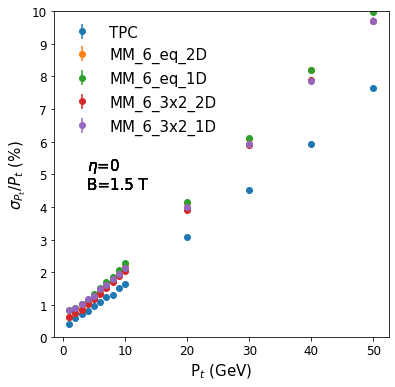

In [8]:
fig= plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
for i in ["TPC", "MM_6_eq_2D", "MM_6_eq_1D", "MM_6_3x2_2D", "MM_6_3x2_1D"]:
    pt, pt_res, pt_resE, p_res, p_resE = getdata(i)
    ax.errorbar(pt, pt_res, yerr=pt_resE, linestyle='None', marker='o', label=i)
    ax.legend(fontsize=15, frameon=False)
    ax.set_xlabel("P$_t$ (GeV)", fontsize=15)
    ax.set_ylabel("$\sigma_{P_t}/P_t$ (%)", fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    ax.yaxis.set_ticks(np.arange(0, 11, 1))
    ax.set_ylim([0,10])
    ax.text(0.1, 0.5, '$\eta$=0\nB=1.5 T', horizontalalignment='left',
    verticalalignment='center', transform=ax.transAxes, fontsize=15)
fig.savefig("momentum_resolution_pt_eta0.pdf", transparent=True, bbox_inches='tight')
fig.savefig("momentum_resolution_pt_eta0.png", transparent=True, bbox_inches='tight', dpi=600)

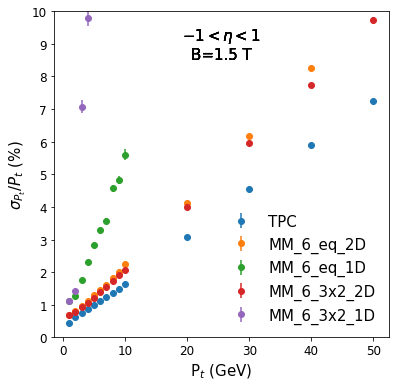

In [10]:
fig= plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
for i in ["TPC", "MM_6_eq_2D", "MM_6_eq_1D", "MM_6_3x2_2D", "MM_6_3x2_1D"]:
    pt, pt_res, pt_resE, *_ = getdata(i,1)
    ax.errorbar(pt, pt_res, yerr=pt_resE, linestyle='None', marker='o', label=i)
    ax.legend(fontsize=15, frameon=False)
    ax.set_xlabel("P$_t$ (GeV)", fontsize=15)
    ax.set_ylabel("$\sigma_{P_t}/P_t$ (%)", fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    ax.yaxis.set_ticks(np.arange(0, 11, 1))
    ax.set_ylim([0,10])
    ax.text(0.5, 0.9, '$-1<\eta<1$\nB=1.5 T', horizontalalignment='center',
    verticalalignment='center', transform=ax.transAxes, fontsize=15)
fig.savefig("momentum_resolution_pt_eta1.pdf", transparent=True, bbox_inches='tight')
fig.savefig("momentum_resolution_pt_eta1.png", transparent=True, bbox_inches='tight', dpi=600)

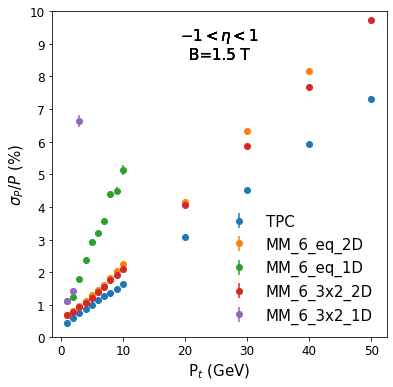

In [11]:
fig= plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
for i in ["TPC", "MM_6_eq_2D", "MM_6_eq_1D", "MM_6_3x2_2D", "MM_6_3x2_1D"]:
    pt, pt_res, pt_resE, p_res, p_resE = getdata(i,1)
    ax.errorbar(pt, p_res, yerr=p_resE, linestyle='None', marker='o', label=i)
    ax.legend(fontsize=15, frameon=False)
    ax.set_xlabel("P$_t$ (GeV)", fontsize=15)
    ax.set_ylabel("$\sigma_{P}/P$ (%)", fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    ax.yaxis.set_ticks(np.arange(0, 11, 1))
    ax.set_ylim([0,10])
    ax.text(0.5, 0.9, '$-1<\eta<1$\nB=1.5 T', horizontalalignment='center',
    verticalalignment='center', transform=ax.transAxes, fontsize=15)
fig.savefig("momentum_resolution_p_eta1.pdf", transparent=True, bbox_inches='tight')
fig.savefig("momentum_resolution_p_eta1.png", transparent=True, bbox_inches='tight', dpi=600)

In [25]:
# estimate slope and intercept
pt, pt_res, pt_resE, *_ = getdata("MM_6_3x2_2D",0)

print((pt_res[pt==50]-pt_res[pt==1])[0]/49)

print(pt_res[pt==50][0]-(pt_res[pt==50]-pt_res[pt==1])[0]/49*50)

0.18518400000000002
0.43156000000000105


In [26]:
# estimate slope and intercept
pt, pt_res, pt_resE, *_ = getdata("TPC",0)

print((pt_res[pt==50]-pt_res[pt==1])[0]/49)

print(pt_res[pt==50][0]-(pt_res[pt==50]-pt_res[pt==1])[0]/49*50)

0.14759985714285714
0.2781371428571431
